In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.covariance import OAS
from sklearn.datasets import make_blobs
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [2]:
n_train = 20  # samples for training
n_test = 200  # samples for testing
n_averages = 50  # how often to repeat classification
n_features_max = 75  # maximum number of features
step = 4  # step size for the calculation

In [3]:
# n_samples: 생성할 데이터 샘플 수
def generate_data(n_samples, n_features):

    # 가우시안 정규 분포를 이용
    # 중심이 -2, 2인 두 개의 cluster로 data를 생성 
    X, y = make_blobs(n_samples=n_samples, n_features=1, centers=[[-2], [2]])

    if n_features > 1:
        X = np.hstack([X, np.random.randn(n_samples, n_features - 1)])
    return X, y

In [4]:
acc_clf1, acc_clf2, acc_clf3 = [], [], []
n_features_range = range(1, n_features_max + 1, step)

for n_features in n_features_range:
    score_clf1, score_clf2, score_clf3 = 0, 0, 0
    for _ in range(n_averages):
        # train data 생성 
        X, y = generate_data(n_train, n_features)

        '''
          clf1: 기본 LDA classifiaction
          clf2: 자동 shrinkage를 적용한 LDA classification
          clf3: Oracle Approximating Shrinkage를 사용한 LDA classification
        '''
        clf1 = LinearDiscriminantAnalysis(solver="lsqr", shrinkage=None).fit(X, y)
        clf2 = LinearDiscriminantAnalysis(solver="lsqr", shrinkage="auto").fit(X, y)
        oa = OAS(store_precision=False, assume_centered=False)
        clf3 = LinearDiscriminantAnalysis(solver="lsqr", covariance_estimator=oa).fit(
            X, y
        )

        # test data 생성 
        X, y = generate_data(n_test, n_features)
        
        score_clf1 += clf1.score(X, y)
        score_clf2 += clf2.score(X, y)
        score_clf3 += clf3.score(X, y)

    acc_clf1.append(score_clf1 / n_averages)
    acc_clf2.append(score_clf2 / n_averages)
    acc_clf3.append(score_clf3 / n_averages)

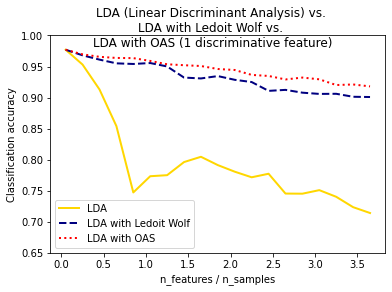

In [5]:
features_samples_ratio = np.array(n_features_range) / n_train

plt.plot(
    features_samples_ratio,
    acc_clf1,
    linewidth=2,
    label="LDA",
    color="gold",
    linestyle="solid",
)
plt.plot(
    features_samples_ratio,
    acc_clf2,
    linewidth=2,
    label="LDA with Ledoit Wolf",
    color="navy",
    linestyle="dashed",
)
plt.plot(
    features_samples_ratio,
    acc_clf3,
    linewidth=2,
    label="LDA with OAS",
    color="red",
    linestyle="dotted",
)

plt.xlabel("n_features / n_samples")
plt.ylabel("Classification accuracy")

plt.legend(loc="lower left")
plt.ylim((0.65, 1.0))
plt.suptitle(
    "LDA (Linear Discriminant Analysis) vs. "
    + "\n"
    + "LDA with Ledoit Wolf vs. "
    + "\n"
    + "LDA with OAS (1 discriminative feature)"
)
plt.show()